In [13]:
# Using boston house pricing dataset in sklearn
from sklearn import datasets
import pandas as pd

In [28]:
boston = datasets.load_boston()
X = boston.data
Y = boston.target
features = boston.feature_names
df = pd.DataFrame(X,columns=features)
print(df.head())
print(df.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
(506, 13)


In [16]:
# splitting the data points
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.25,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [17]:
# Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

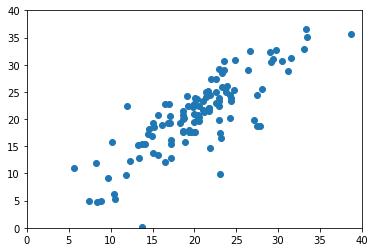

In [18]:
# Testing the model
Y_pred = regressor.predict(X_test)
#plot plot to check how close or far are data points
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.axis([0,40,0,40])
plt.show()

In [19]:
print(regressor.coef_,regressor.intercept_)

[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01] 36.933255457118975


In [44]:
train_score = regressor.score(X_train,Y_train)
test_score = regressor.score(X_test,Y_test)
print(train_score,test_score)

0.7697699488741149 0.6354638433202129


In [37]:
# adding all the 2d features columns and checking the score
df1 = df.copy()
l = df.columns
s = set()
for i in l:
    for j in l:
        c_name = i+"_"+j
        if(i<j):
            c_name = j+"_"+i
        if(c_name not in s):
            df1[c_name] = df[i] * df[j]
            s.add(c_name)
X2 = df1.values
print(X2.shape)

(506, 104)


In [38]:
X2_train,X2_test,Y2_train,Y2_test = model_selection.train_test_split(X2,Y,test_size=0.25,random_state=0)
print(X2_train.shape,X2_test.shape,Y2_train.shape,Y2_test.shape)

(379, 104) (127, 104) (379,) (127,)


In [40]:
alg1 = LinearRegression()
alg1.fit(X2_train,Y2_train)

LinearRegression()

In [43]:
train2_score = alg1.score(X2_train,Y2_train)
test2_score = alg1.score(X2_test,Y2_test)
print("Train Score after adding all 2d features: ",train2_score)
print("Train Score after adding all 2d features: ",test2_score)

Train Score after adding all 2d features:  0.9520519609032728
Train Score after adding all 2d features:  0.607472195968976
